In [2]:
library(rjson)
library(igraph)
library(data.table)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [3]:
json_data <- fromJSON(paste(readLines("san_francisco_censustracts.json"), collapse=""))
ver_attr <- data.frame(matrix(ncol = 3, nrow = 0))
x <- c("id", "name", "coor")
colnames(ver_attr) <- x
length(json_data$features)
for (i in (1:length(json_data$features))){
    coor_len <- length(json_data$features[[i]]$geometry$coordinates[[1]][[1]])
    latitude <- 0
    longitude <- 0
    for (j in (1:coor_len)){
        latitude <- latitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][1]
        longitude <- longitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][2]
    }
    x <- latitude / coor_len
    y <- longitude / coor_len
    id <- json_data$features[[i]]$properties$MOVEMENT_ID
    name <- json_data$features[[i]]$properties$DISPLAY_NAME
    ver_attr[nrow(ver_attr) + 1,] = list(id, name, list(c(x, y)))
}
nrow(ver_attr)
head(ver_attr)
print(ver_attr[1,]$coor[[1]][2])

Warning message in readLines("san_francisco_censustracts.json"):
"於 'san_francisco_censustracts.json' 找到不完整的最後一列"

[1] 2710

[1] 2710

id,name,coor
1,"Sargent Creek, San Ardo","-120.78868, 36.07163"
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City","-122.21941, 37.46958"
3,"18300 Sutter Boulevard, Morgan Hill","-121.66022, 37.15048"
4,"2700 Stoughton Way, Sheffield, Sacramento","-121.34285, 38.57307"
5,"3200 Huntsman Drive, Rosemont Park, Sacramento","-121.36171, 38.55443"
6,"100 Carlsbad Circle, Vacaville","-121.94843, 38.36665"


[1] 36.07163


In [4]:
system.time(edge_list <- fread("san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"))
nrow(edge_list)
edge_list <- edge_list[which(edge_list[,"month"]==12)]
nrow(edge_list)
head(edge_list)

edge_list <- edge_list[,c("sourceid","dstid","mean_travel_time"), drop = FALSE]
head(edge_list)
colnames(edge_list)[3] <- "weight"
head(edge_list)

   user  system elapsed 
   0.43    0.06    6.98 

[1] 1605957

[1] 538998

sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
1938,1952,12,596.69,327.27,530.23,1.60
1747,629,12,1454.81,536.38,1378.06,1.37
1872,1919,12,1227.01,391.90,1169.76,1.36
1871,1929,12,1005.54,308.34,965.06,1.32
81,2319,12,474.53,198.14,446.37,1.41
1873,1909,12,1164.51,461.02,1092.71,1.41


sourceid,dstid,mean_travel_time
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


sourceid,dstid,weight
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


In [5]:
graph <- graph.data.frame(edge_list, directed=F)
graph <- simplify(graph, remove.multiple = TRUE, remove.loops = TRUE,
  edge.attr.comb = list(weight="mean", "ignore"))
E(graph)
V(graph)
graph <- set.vertex.attribute(graph, name="location", value=list(c(0,0)))
graph <- set.vertex.attribute(graph, name="Display_name", value="b")

+ 311812/311812 edges from 54fd3a2 (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--1721 1938--176  1938--74   1938--1755 1938--1946 1938--1729
[13] 1938--722  1938--234  1938--251  1938--544  1938--1856 1938--338 
[19] 1938--175  1938--687  1938--818  1938--695  1938--682  1938--817 
[25] 1938--153  1938--272  1938--1455 1938--876  1938--131  1938--2147
[31] 1938--396  1938--2146 1938--2155 1938--52   1938--1269 1938--123 
[37] 1938--155  1938--235  1938--702  1938--1284 1938--1925 1938--2613
[43] 1938--1907 1938--1952 1938--1933 1938--957  1938--1906 1938--2513
[49] 1938--2515 1938--1870 1938--1928 1938--1923 1938--1597 1938--104 
[55] 1938--2488 1938--1893 1938--1875 1938--184  1938--65   1938--2169
+ ... omitted several edges

+ 1887/1887 vertices, named, from 54fd3a2:
   [1] 1938 1747 1872 1871 81   1873 232  1891 2423 650  680  542  604  660 
  [15] 1329 2421 1736 2021 550  1721 1700 176  536  74   288  169  99   1755
  [29] 646  2315 2322 2307 1390 641  1946 2357 1454 1729 2355 722  612  98  
  [43] 1074 1058 614  151  2341 1056 1745 1438 1473 1469 234  1098 1457 289 
  [57] 222  1059 1448 610  1097 1458 1484 315  1727 251  388  1748 544  1025
  [71] 1856 1726 1296 1749 338  1066 613  175  535  1451 2700 687  809  387 
  [85] 859  1739 1808 818  1838 738  695  685  682  817  627  339  605  153 
  [99] 609  647  645  272  284  1455 397  1409 876  1437 131  2210 347  1759
 [113] 2147 1359 2187 152  2113 396  2146 2155 2132 277  1258 369  52   2110
 [127] 1269 2157 1504 1456 1526 2111 123  1259 446  445  1514 1170 478  2401
+ ... omitted several vertices

In [6]:
for (i in 1:nrow(ver_attr)){
    V(graph)[which(V(graph)$name == ver_attr[i,]$id)]$Display_name <- ver_attr[i,]$name
    V(graph)[which(V(graph)$name == ver_attr[i,]$id)]$location <- ver_attr[i,]$coor
}
V(graph)[1]$name
V(graph)[1]$Display_name
V(graph)[1]$location

[1] "1938"

[1] "3300 Brodie Drive, South San Jose, San Jose"

[[1]]
[1] -121.82174   37.29051

In [7]:
graph.components <- clusters(graph)
ix <- which.max(graph.components$csize)
graph.giant <- induced.subgraph(graph, which(graph.components$membership == ix))
V(graph.giant)
E(graph.giant)

+ 1880/1880 vertices, named, from 6e08a80:
   [1] 1938 1747 1872 1871 81   1873 232  1891 2423 650  680  542  604  660 
  [15] 1329 2421 1736 2021 550  1721 1700 176  536  74   288  169  99   1755
  [29] 646  2315 2322 2307 1390 641  1946 2357 1454 1729 2355 722  612  98  
  [43] 1074 1058 614  151  2341 1056 1745 1438 1473 1469 234  1098 1457 289 
  [57] 222  1059 1448 610  1097 1458 1484 315  1727 251  388  1748 544  1025
  [71] 1856 1726 1296 1749 338  1066 613  175  535  1451 2700 687  809  387 
  [85] 859  1739 1808 818  1838 738  695  685  682  817  627  339  605  153 
  [99] 609  647  645  272  284  1455 397  1409 876  1437 131  2210 347  1759
 [113] 2147 1359 2187 152  2113 396  2146 2155 2132 277  1258 369  52   2110
 [127] 1269 2157 1504 1456 1526 2111 123  1259 446  445  1514 1170 478  2401
+ ... omitted several vertices

+ 311802/311802 edges from 6e08a80 (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--1721 1938--176  1938--74   1938--1755 1938--1946 1938--1729
[13] 1938--722  1938--234  1938--251  1938--544  1938--1856 1938--338 
[19] 1938--175  1938--687  1938--818  1938--695  1938--682  1938--817 
[25] 1938--153  1938--272  1938--1455 1938--876  1938--131  1938--2147
[31] 1938--396  1938--2146 1938--2155 1938--52   1938--1269 1938--123 
[37] 1938--155  1938--235  1938--702  1938--1284 1938--1925 1938--2613
[43] 1938--1907 1938--1952 1938--1933 1938--957  1938--1906 1938--2513
[49] 1938--2515 1938--1870 1938--1928 1938--1923 1938--1597 1938--104 
[55] 1938--2488 1938--1893 1938--1875 1938--184  1938--65   1938--2169
+ ... omitted several edges

In [8]:
g_mst <- minimum.spanning.tree(graph.giant)

In [9]:
for( i in 1:5){
    vs <- ends(g_mst, E(g_mst)[i])
    print(i)
    print(V(g_mst)[which(V(g_mst)$name==vs[1])]$Display_name)
    print(V(g_mst)[which(V(g_mst)$name==vs[2])]$Display_name)
}

[1] 1
[1] "3300 Brodie Drive, South San Jose, San Jose"
[1] "4300 La Torre Avenue, South San Jose, San Jose"
[1] 2
[1] "3300 Brodie Drive, South San Jose, San Jose"
[1] "3700 McLaughlin Avenue, South San Jose, San Jose"
[1] 3
[1] "3300 Brodie Drive, South San Jose, San Jose"
[1] "400 Ginkgo Court, South San Jose, San Jose"
[1] 4
[1] "1700 Coyote Point Drive, Shoreview, San Mateo"
[1] "1800 Helene Court, East San Mateo, San Mateo"
[1] 5
[1] "1700 Coyote Point Drive, Shoreview, San Mateo"
[1] "600 Lexington Way, Oak Grove Manor, Burlingame"


In [34]:
examples <- 0
success <- 0
vcount(graph.giant)
while(1){
    if(examples == 1000) break
    first <- sample(1:vcount(graph.giant), 1)
    nei <- neighbors(graph.giant, V(graph.giant)[first])
    if(length(nei)<2) next
    second <- sample(1:length(nei), 1)
    third <- sample(1:length(nei), 1)
    if(second==third) next
    if(!are_adjacent(graph.giant, nei[second], nei[third])) next
    a <- E(graph.giant)[V(graph.giant)[first] %--% nei[third]]$weight
    b <- E(graph.giant)[nei[second] %--% V(graph.giant)[first]]$weight
    c <- E(graph.giant)[nei[second] %--% nei[third]]$weight
    if((a+b>=c) & (a+c>=b) & (c+b>=a))
        success <- success + 1   
    examples <- examples + 1
}
print(success)
print(examples)

[1] 1880

[1] 909
[1] 1000


[1] 8514.21
[1] 428671.3


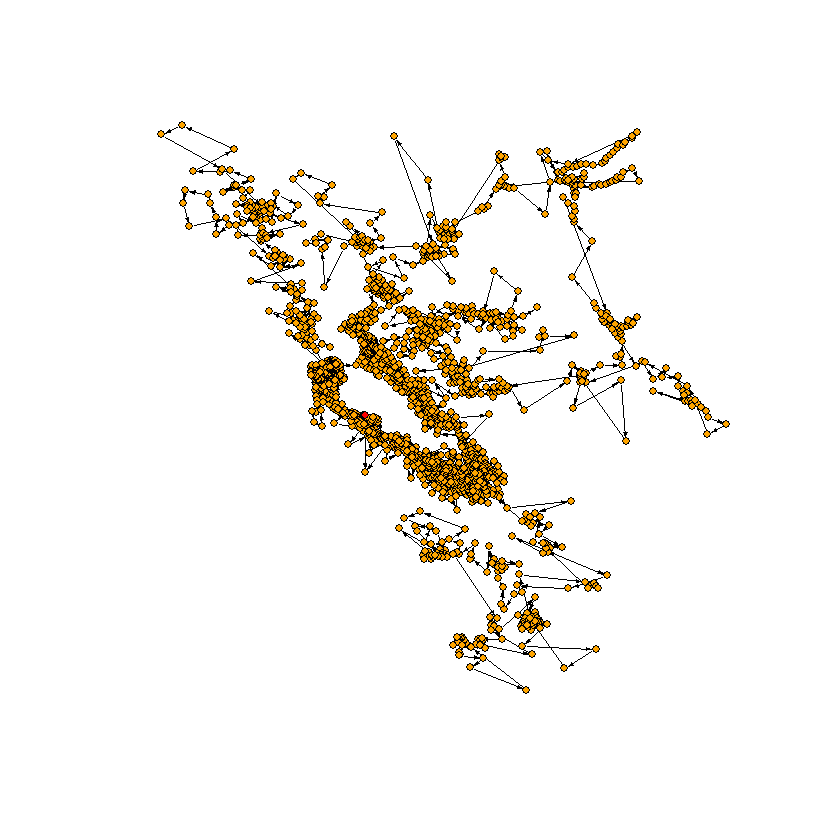

In [51]:
for(i in 1:200){
    first <- sample(1:vcount(graph.giant), 1)
    nei <- neighbors(graph.giant, V(graph.giant)[first])
    second <- sample(1:length(nei), 1)
    time <-E(graph.giant)[nei[second] %--% V(graph.giant)[first]]$weight
    x <- abs(V(graph.giant)[first]$location[[1]][1] - nei[second]$location[[1]][1])
    y <- abs(V(graph.giant)[first]$location[[1]][2] - nei[second]$location[[1]][2])
    mag <- time/sqrt(x*x+y*y)
}
print(mag)
preorder <- dfs(g_mst, 2, order = TRUE, dist=TRUE)
emperical <- 0
path <- graph.empty(n=0, directed=T)
path <- add_vertices(path, 1, color="red",name = preorder$order[1]$name, Display_name=preorder$order[1]$Display_name, location=preorder$order[1]$location)
for (i in 1:(length(preorder$order)-1)){
    if(length(E(graph.giant)[preorder$order[i]$name %--% preorder$order[i+1]$name])>0){
        edge_weight <- E(graph.giant)[preorder$order[i]$name %--% preorder$order[i+1]$name]$weight
    } else{
        x <- abs(V(graph.giant)[preorder$order[i]$name]$location[[1]][1]-V(graph.giant)[preorder$order[i+1]$name]$location[[1]][1])
        y <- abs(V(graph.giant)[preorder$order[i]$name]$location[[1]][2]-V(graph.giant)[preorder$order[i+1]$name]$location[[1]][2])
        diff <- sqrt(x*x+y*y)
        edge_weightl <- mag*diff
    }
    #path <- add_vertices(path, 1,color="orange", name = preorder$order[i]$name, Display_name=preorder$order[i]$Display_name, location=preorder$order[i]$location)
    path <- add_vertices(path, 1, color="orange",name = preorder$order[i+1]$name, Display_name=preorder$order[i]$Display_name, location=preorder$order[i+1]$location)
    path <- add_edges(path, c(preorder$order[i]$name,preorder$order[i+1]$name), weight=edge_weight)
    emperical <- emperical  +  edge_weight
}
if(length(E(graph.giant)[preorder$order[1]$name %--% preorder$order[length(preorder$order)]$name])>0){
    edge_weight <- E(graph.giant)[preorder$order[1]$name %--% preorder$order[length(preorder$order)]$name]$weight
} else{
    x <- abs(V(graph.giant)[preorder$order[1]$name]$location[[1]][1]-V(graph.giant)[preorder$order[length(preorder$order)]$name]$location[[1]][1])
    y <- abs(V(graph.giant)[preorder$order[1]$name]$location[[1]][2]-V(graph.giant)[preorder$order[length(preorder$order)]$name]$location[[1]][2])
    diff <- sqrt(x*x+y*y)
    edge_weightl <- mag*diff
}
path <- add_vertices(path, 1, color="red",name = preorder$order[1]$name, Display_name=preorder$order[1]$Display_name, location=preorder$order[1]$location)
#path <- add_vertices(path, 1, color="orange",name = preorder$order[length(preorder$order)]$name, Display_name=preorder$order[length(preorder$order)]$Display_name, location=preorder$order[length(preorder$order)]$location)
path <- add_edges(path, c(preorder$order[length(preorder$order)]$name, preorder$order[1]$name), weight=edge_weight)
emperical <- emperical  +  edge_weight
print(emperical)
output <- do.call(rbind,lapply(V(path)$location,matrix,ncol=2,byrow=TRUE))
plot(path, vertex.size=3, vertex.label=NA, edge.color="black",edge.arrow.size=0.2, edge.width=0.05, layout = output)